#### Data load

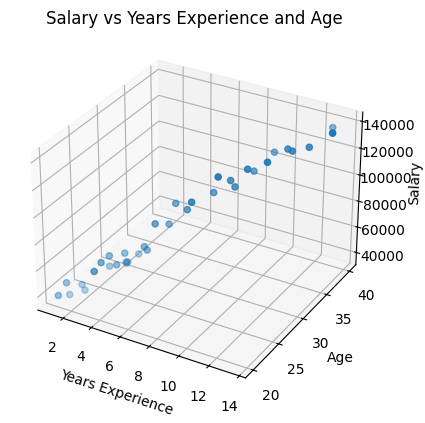

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Salary.csv', sep=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['YearsExperience'], df['Age'], df['Salary'])
ax.set_xlabel('Years Experience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
ax.set_title('Salary vs Years Experience and Age')
plt.show()

#### Algorithm

In [2]:
import random
import sys
from typing import Tuple

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    epsilon = sys.float_info.epsilon
    return random.uniform(epsilon, 1 - epsilon) if alpha is None else alpha, np.random.uniform(epsilon, 1 - epsilon, n + 1)


def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    return betas[0] + X.dot(betas[1:])


def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    return np.sum(np.square(calculate_regression_function(X, betas) - y)) / (2 * len(y))


def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    n = len(y)
    y_pred = calculate_regression_function(X, betas)
    gradient = np.zeros_like(betas)
    gradient[0] = (1 / n) * np.sum(y_pred - y)
    gradient[1:] = (1 / n) * X.T.dot(y_pred - y)
    return gradient


def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    gradient = calculate_gradient(X, y, betas)
    return betas - alpha * gradient

#### Training model

In [3]:
EPOCHS = 10000

def learn_and_fit(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    betas, error = np.empty((EPOCHS, X.shape[1] + 1)), np.empty(EPOCHS)
    alpha, betas_arr = initialize_coefficients(X.shape[1], alpha = 0.001)
    for epoch in range(EPOCHS):
        betas_arr = update_regression_coefficients(X, y, betas_arr, alpha)

        betas[epoch, :] = betas_arr
        error[epoch] = calculate_error(X, y, betas_arr)
        
    return betas, error

In [4]:
X = df[['YearsExperience', 'Age']].values
y = df['Salary'].values / 100000.0

betas, error = learn_and_fit(X, y)

#### Results

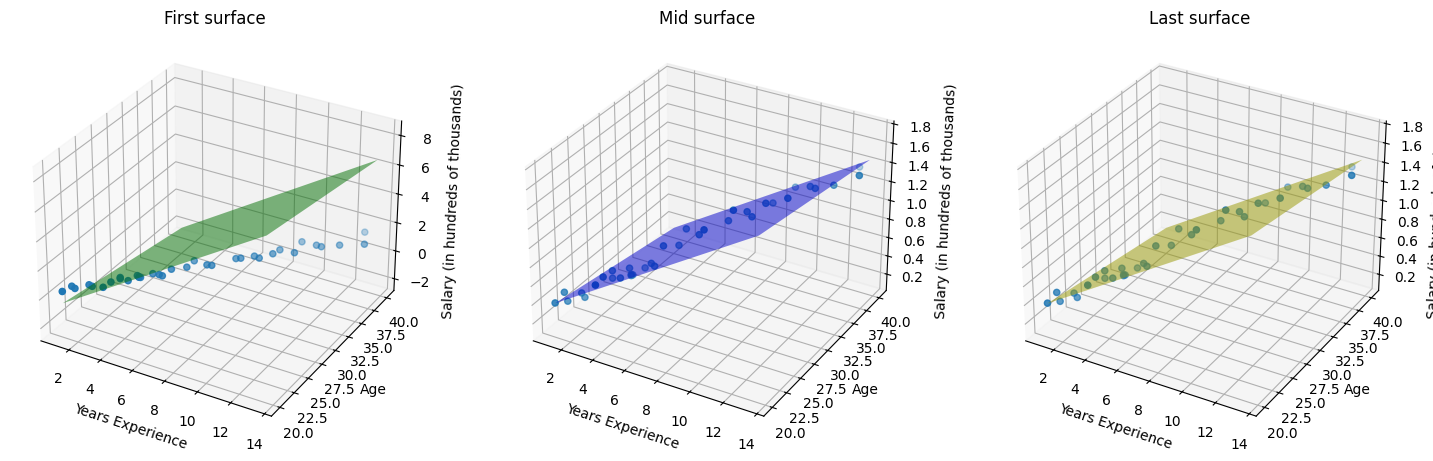

In [5]:
fig = plt.figure(figsize=(18, 6))

betas_first = betas[0]
betas_mid = betas[len(betas) // 2]
betas_last = betas[-1]

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), num=10)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), num=10)
x1, x2 = np.meshgrid(x1, x2)

y_first = betas_first[0] + betas_first[1] * x1 + betas_first[2] * x2
y_mid = betas_mid[0] + betas_mid[1] * x1 + betas_mid[2] * x2
y_last = betas_last[0] + betas_last[1] * x1 + betas_last[2] * x2

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y)
ax1.plot_surface(x1, x2, y_first, alpha=0.5, rstride=100, cstride=100, color='g')
ax1.set_xlabel('Years Experience')
ax1.set_ylabel('Age')
ax1.set_zlabel('Salary (in hundreds of thousands)')
ax1.set_title('First surface')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y)
ax2.plot_surface(x1, x2, y_mid, alpha=0.5, rstride=100, cstride=100, color='b')
ax2.set_xlabel('Years Experience')
ax2.set_ylabel('Age')
ax2.set_zlabel('Salary (in hundreds of thousands)')
ax2.set_title('Mid surface')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X[:, 0], X[:, 1], y)
ax3.plot_surface(x1, x2, y_last, alpha=0.5, rstride=100, cstride=100, color='y')
ax3.set_xlabel('Years Experience')
ax3.set_ylabel('Age')
ax3.set_zlabel('Salary (in hundreds of thousands)')
ax3.set_title('Last surface')

plt.show()

In [6]:
df = pd.read_csv('multi_variable_regression.csv')
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

betas, error = learn_and_fit(X, y)

print("Znalezione współczynniki:", betas[-1])
print("Błąd po ostatniej epoce:", error[-1])

Znalezione współczynniki: [-7.88369610e-03  4.94864194e+01  7.40395699e+01  4.27379011e+00
  8.88955918e+01  8.89827323e+00  9.87707272e+01]
Błąd po ostatniej epoce: 0.0008046698222911666


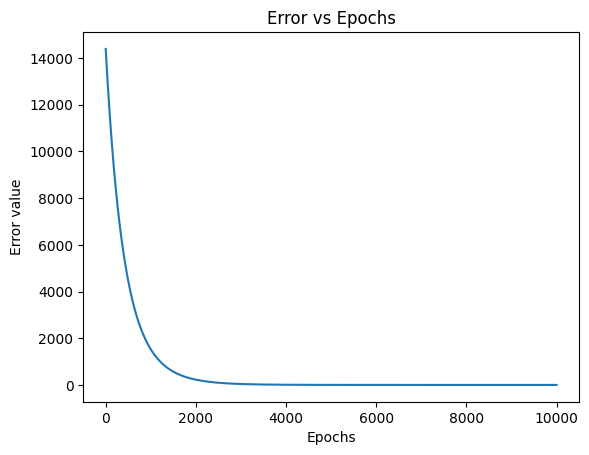

In [7]:
plt.plot(error)

plt.title("Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error value")

plt.show()

#### Learning rate

In [8]:
# nowa wersja funkcji, która pozwala na ustawienie współczynnika alpha przez parametr
def learn_and_fit_with_alpha(X: np.ndarray, y: np.ndarray, alpha: float = 0.001) -> Tuple[np.ndarray, np.ndarray]:
    betas, error = np.empty((EPOCHS, X.shape[1] + 1)), np.empty(EPOCHS)
    alpha, betas_arr = initialize_coefficients(X.shape[1], alpha = alpha)
    
    for epoch in range(EPOCHS):
        betas_arr = update_regression_coefficients(X, y, betas_arr, alpha)

        betas[epoch, :] = betas_arr
        error[epoch] = calculate_error(X, y, betas_arr)
        
    return betas, error

Wartości współczynników beta w ostatniej epoce dla alpha = 0.004:
['-2.060E-11', '4.949E+01', '7.405E+01', '4.309E+00', '8.890E+01', '8.910E+00', '9.880E+01']
Wartości współczynników beta w ostatniej epoce dla alpha = 0.002:
['-1.404E-05', '4.949E+01', '7.405E+01', '4.309E+00', '8.890E+01', '8.910E+00', '9.880E+01']
Wartości współczynników beta w ostatniej epoce dla alpha = 0.001:
['-7.603E-03', '4.949E+01', '7.404E+01', '4.274E+00', '8.890E+01', '8.898E+00', '9.877E+01']
Wartości współczynników beta w ostatniej epoce dla alpha = 0.0005:
['1.532E-01', '4.942E+01', '7.366E+01', '3.119E+00', '8.834E+01', '8.463E+00', '9.748E+01']
Wartości współczynników beta w ostatniej epoce dla alpha = 0.00025:
['2.501E+00', '4.809E+01', '7.044E+01', '-2.226E+00', '8.231E+01', '6.444E+00', '8.844E+01']


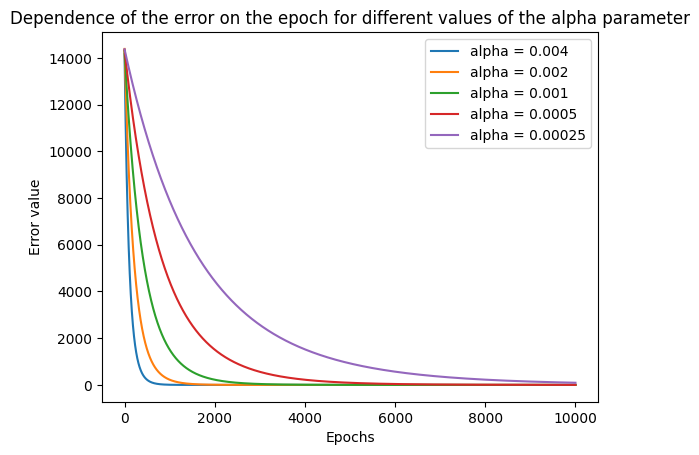

In [9]:
for alpha in [0.004, 0.002, 0.001, 0.0005, 0.00025]:
    betas, error = learn_and_fit_with_alpha(X, y, alpha)
    print(f'Wartości współczynników beta w ostatniej epoce dla alpha = {alpha}:\n{["{:.3E}".format(x) for x in betas[-1]]}')
    plt.plot(error, label=f'alpha = {alpha}')

plt.title("Dependence of the error on the epoch for different values of the alpha parameter")
plt.xlabel("Epochs")
plt.ylabel("Error value")

plt.legend()
plt.show()

#### Time comparison with scikit-learn implementation

In [10]:
from sklearn.linear_model import SGDRegressor

# sprawdzenie działania modelu z biblioteki
# ustawienia takie, aby odpowiadało to działaniu zaimplementowanej funkcji (stała liczba epok, stały współczynnik uczenia)
model = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=0.001, tol=None)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

[0.00145747]
[49.48558348 74.0411766   4.30500717 88.89062986  8.90813182 98.7870947 ]


In [11]:
# porównanie czasów wykonania

%timeit -n 20 model = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=0.001, tol=None); model.fit(X, y)

%timeit -n 20 learn_and_fit(X, y)

25.5 ms ± 217 μs per loop (mean ± std. dev. of 7 runs, 20 loops each)
136 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 20 loops each)
